In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
pd.options.display.max_colwidth  = 500

In [4]:
comment = pd.read_excel("sentipers.xlsx")

In [5]:
comment.head()

,index,sid,text,polarity,file,polarity0
0,0,rev-1,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری کمپانی Hp را معرفی کنیم.,medium,data/main/HP LaserJet M1132.xml,0
1,1,rev-2,پرینتری چند کاره از رده‌ی Entry Level یا سطح مبتدی.,medium,data/main/HP LaserJet M1132.xml,0
2,2,rev-3,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، که کاربران پرینترها انتظارات بالاتری علاوه بر گرفتن پرینت ساده از دستگاه خود دارند.,medium,data/main/HP LaserJet M1132.xml,0
3,3,rev-4,به صورتی که توانایی کپی کردن، اسکن، فکس، پرینت عکس، پرینت دورو، قابلیت اتصال از طریق Bluetooth و WiFi را نیز باید داشته باشد.,medium,data/main/HP LaserJet M1132.xml,0
4,4,rev-5,به هر صورت معمولا چیزی که بیشتر کاربران از پرینتری پر کار در این سطح قیمت برای خانه و یا دفتر کار انتظار دارند، تولید پرینت های با کیفیت بالا، با سرعت زیاد و البته هزینه‌ی نگهداری پایین است.,Excellent,data/main/HP LaserJet M1132.xml,2


In [6]:
comment.shape

(15683, 6)

In [7]:
import matplotlib.pyplot as plt
Sentiment_count=comment.groupby('polarity').count()
Sentiment_count

,index,sid,text,file,polarity0
polarity,,,,,
Excellent,2940,2940,2940,2940,2940
Veryweak,212,212,212,212,212
good,5019,5019,5019,5019,5019
medium,5938,5938,5938,5938,5938
weak,1574,1574,1574,1574,1574


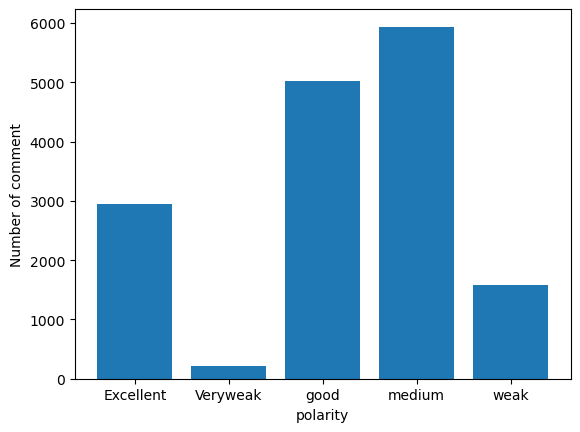

In [8]:
plt.bar(Sentiment_count.index.values, Sentiment_count['text'])
plt.xlabel('polarity')
plt.ylabel('Number of comment')
plt.show()

In [11]:
#from hazm import word_tokenize
#from hazm import Normalizer
#import re

In [12]:
def remove_pronunciation_symbols(text):
    punctuation_symbols = [
    ('،', '،', 'comma'),                     # Comma
    ('؛', ';', 'semicolon'),                  # Semicolon
    ('.', '.', 'period'),                     # Period
    ('؟', '?', 'question mark'),              # Question mark
    ('!', '!', 'exclamation mark'),           # Exclamation mark
    ('…', '...', 'ellipsis'),                  # Ellipsis
    ('-', '-', 'hyphen'),                     # Hyphen
    ('–', '-', 'en dash'),                    # En dash
    ('—', '—', 'em dash'),                    # Em dash
    ('“', '"', 'left double quotation mark'),  # Left double quotation mark
    ('”', '"', 'right double quotation mark'), # Right double quotation mark
    ('‘', "'", 'left single quotation mark'),  # Left single quotation mark
    ('’', "'", 'right single quotation mark'), # Right single quotation mark
    (':', ':', 'colon'),                      # Colon
    ('(', '(', 'left parenthesis'),           # Left parenthesis
    (')', ')', 'right parenthesis'),          # Right parenthesis
    ('[', '[', 'left square bracket'),        # Left square bracket
    (']', ']', 'right square bracket'),       # Right square bracket
    ('{', '{', 'left curly brace'),           # Left curly brace
    ('}', '}', 'right curly brace'),          # Right curly brace
]
   
    # Remove Farsi symbols
    for farsi_symbol in punctuation_symbols:
        text = text.replace(farsi_symbol[0], "")
    
    # Remove English symbols
    for english_symbol in punctuation_symbols:
        text = text.replace(english_symbol[1], "")

    return text

In [13]:
comment[['text']] = comment[['text']].applymap(remove_pronunciation_symbols)

In [14]:
' '.join(comment[['text']])

'text'

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
#from hazm import stopwords_list


In [17]:
Comment_to_list = [sentence[0] for sentence in comment.loc[:, ['text']].values]
print(Comment_to_list[0:2])

all_text = ' '.join(Comment_to_list)
words = all_text.split(' ')
print(len(words))
Counter(words).most_common(10)

['اینک قصد داریم پرینتر دیگری از پرینترهای لیزری کمپانی Hp را معرفی کنیم', 'پرینتری چند کاره از رده\u200cی Entry Level یا سطح مبتدی']
343130


[('', 11961),
 ('و', 11514),
 ('به', 8474),
 ('که', 8320),
 ('از', 7149),
 ('در', 7066),
 ('با', 5532),
 ('این', 4027),
 ('است', 3899),
 ('اين', 3703)]

In [19]:
#len(stopwords_list())

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,max_error

In [21]:
label_data = comment['polarity']

In [22]:
label_data.unique()

array(['medium', 'Excellent', 'good', 'weak', 'Veryweak'], dtype=object)

In [23]:
label_data = label_data.str.replace('Veryweak','Negative')
label_data = label_data.str.replace('weak','Negative')
label_data = label_data.str.replace('medium','Neutral')
label_data = label_data.str.replace('good','Positive')
label_data = label_data.str.replace('Excellent','Positive')

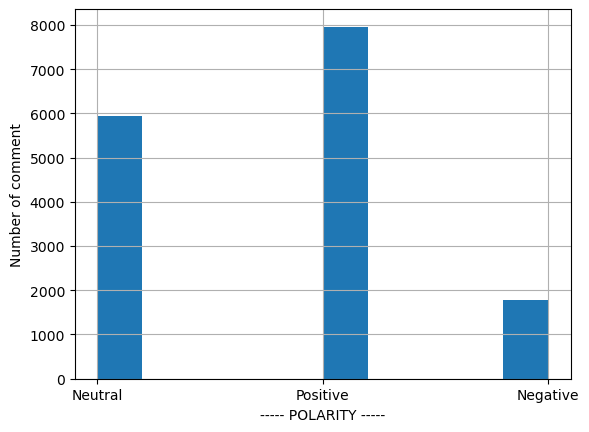

In [24]:
plt.hist(label_data)
plt.xlabel('----- POLARITY -----')
plt.ylabel('Number of comment')
plt.grid()
plt.show()

In [25]:
#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(   use_idf=True, 
                                smooth_idf=False,  
                                ngram_range=(1,1),
                                stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform(Comment_to_list)

#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())
print(tf_idf_data.shape)
tf_idf_dataframe

Without Smoothing:
(15683, 14567)


,000,0000,01,016,03,037,040,043,05,06,07,08,10,100,1000,10000,1008,100d,100g,100g7,100x56x24,100قابل,101,101sony,102,1022mm,1024,102400,102نکات,103,1030,104,105,105x60x34,106,107,1077,107x62x35,1080,1080i,1080p,1080نکات,109,10cm,10x,10اسپيکرهاي,10انتن,10بهش,10روزه,10ساعت,...,۲_۳,۲روزه,۲۰,۲۰۰۰,۲۰۰۰ميلادي,۲۰۰۲,۲۰۰۵,۲۰۰۷,۲۱,۲۱x,۲۲۰,۲۴,۲۴۰,۲۴۰۰,۲۵۰,۲۵۶,۲۸نانومتري,۳۰۰,۳۲,۳۳,۳۵,۳۶۰,۳۶۰را,۴اس,۴هسته,۴۰,۴۰۰۰,۴۵۳۰,۴۵۴۰,۴۷,۴۸,۵۰۰,۵۱۰۰d,۵۱۲,۵۶۰۰,۶۰۰,۶۰۰d,۶۲۰,۶۲۵,۶۴,۶۵,۷۰۰,۷۵,۸۰۰,ﺍﻧﺪﺭﻭﻳﺪﻳﻬﺎ,ﺑﻪ,ﺑﻬﺘﺮﻳﻨﻪ,ﺑﻴﻦ,ﻣﻦ,ﻧﻈﺮ
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15678,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

In [26]:
from sklearn.decomposition import PCA

In [ ]:
%%time
final_pc     = PCA(n_components=2000).fit(tf_idf_dataframe)
DATA_reduced = final_pc.fit_transform(tf_idf_dataframe)

In [28]:
print( sum(final_pc.explained_variance_ratio_) )

NameError: name 'final_pc' is not defined

In [ ]:
tf_idf_dataframe.shape

In [ ]:
# DATA_reduced.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DATA_reduced, label_data, test_size=0.2, random_state=123)
# Initialize and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(1500, 1000),activation='logistic', max_iter=50,verbose=True)
mlp.fit(X_train, y_train)
# Make predictions on the test data
y_pred = mlp.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

In [ ]:
from joblib import dump,load
# Save the MLP model
dump(mlp, 'mlp_model.pkl')

In [ ]:
pd.DataFrame({'pred':y_pred,'test':y_test}).head(10)

In [ ]:
mlp_from_file = load('mlp_model.pkl')

In [ ]:
sentence0 = [' سلام و عرض ادب من به شما خرید این محصول رو توصیه میکنم']
sentence1 = [' بسیار بدرد نخور بود من مرجوع کردم']
sentence2 = ['خیلی هم خوش رنگ هست']
sentence3 = ['من که خیلی ازش راضی ام واقعا خوب کار می کنه و باعث شده کارهام رو سریع انجام بدم دمشون گرم خیلی باحالن']
sentence4 = ['اصلا کیفیت نداشت فک میکردم چون سونیه عالیه بزارید یه چیزیو بهتون بگم این هدفون جوریه که بورای شنیدن صدا ازش حتما باید پایه بیسیمشو بزنی برق و بعد وصل کنی به اون چیزی که ازش میخوای صدا بگیری درغیر اینصورت حتی با کابل هم به گوشی وص نمیشه به کارتون نمیاد منم که خریدم میخوام که بفروشمش این اشتباهی که من کردمو نکنید	']
sentence5 = ['هر طور صلاح می دونی']

In [ ]:
tfidf_data      = tf_idf_vec.transform(sentence5)
print(tfidf_data.shape)
final_pc_data   = final_pc.transform(tfidf_data.toarray())
print(final_pc_data.shape)
mlp_from_file.predict(final_pc_data) 

In [ ]:
# mlp.partial_fit

In [10]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object and fit it to the label data
smote = SMOTE(sampling_strategy='minority')
label_data_smote = smote.fit_sample(label_data)

# Create a new DataFrame with the balanced label data
label_data_balanced = pd.DataFrame(label_data_smote, columns=['
# Re-run the code for feature extraction and model training with the balanced label data
tf_idf_dataframe = pd.DataFrame(tf_idf_vec.fit_transform(Comment_to_list), columns=tf_idf_vec.get_feature_names_out())
final_pc = PCA(n_components=2000).fit(tf_idf_dataframe)
DATA_reduced = final_pc.fit_transform(tf_idf_dataframe)
X_train, X_test, y_train, y_test = train_test_split(DATA_reduced, label_data_balanced, test_size=0.2, random_state=123)
mlp = MLPClassifier(hidden_layer_sizes=(1500, 1000), activation='logistic', max_iter=50, verbose=True)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


SyntaxError: unterminated string literal (detected at line 8) (4234538853.py, line 8)